## Problem 1: Image Classification by CNN

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size.

CIFAR-10 is included in **torchvision**, so we don't have to upload the dataset to Colab.



In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))])

# Randomly split the training set into 45000 training and 5000 validation
generator1 = torch.Generator().manual_seed(42)
cifar10_trainset, cifar10_valset = torch.utils.data.random_split(datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform), [45000, 5000], generator1)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_val_loader = DataLoader(cifar10_valset, batch_size=128, shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Visualize some samples in the CIFAR-10 dataset.

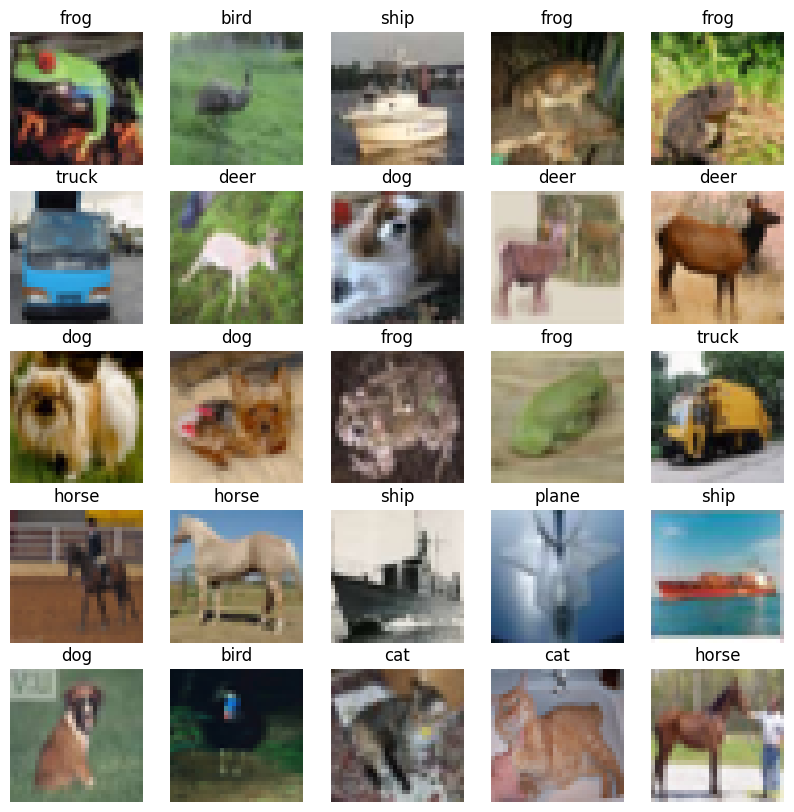

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axs = plt.subplots(5, 5, figsize = (10, 10))
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(cifar10_trainset[i][0]))
  ax.axis('off')
  ax.set_title('{}'.format(classes[cifar10_trainset[i][1]]))

In [ ]:
cifar_train_loader = DataLoader(cifar10_trainset, batch_size=128, shuffle=True)

Given the following network parameters, implement CNN1 using PyTorch.


In [ ]:
'''
CNN1(
  (convs): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (16): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): ReLU(inplace=True)
    (18): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fcs): Sequential(
    (0): Linear(in_features=32, out_features=10, bias=True)
  )
)
'''

'\nCNN1(\n  (convs): Sequential(\n    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))\n    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n    (3): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))\n    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (5): ReLU(inplace=True)\n    (6): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))\n    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (8): ReLU(inplace=True)\n    (9): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))\n    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (11): ReLU(inplace=True)\n    (12): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))\n    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (14): ReLU(inplace=

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.convs = nn.Sequential(
      nn.Conv2d(3, 8, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(8),
      nn.ReLU(inplace=True),
      nn.Conv2d(8, 8, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(8),
      nn.ReLU(inplace=True),
      nn.Conv2d(8, 16, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 16, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)

    )
    self.fcs = nn.Sequential(
      nn.Linear(32, 10)
    )

  def forward(self, x):
    # TODO: define your forward function
    x = self.convs(x)
    x = x.view(x.size(0), -1) # flatten the output
    out = self.fcs(x)
    return out

Let's do classification on CIFAR-10 dataset.
**Note**: remember to keep the logs of training.

In [ ]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# train and test function


import torch.optim as optim
# from tqdm import tqdm
# train
def train(train_loader, net, criterion, optimizer):
  net.train() # training mode
  running_loss = 0.0
  total = 0
  correct = 0
  for i,(inputs, labels) in enumerate(train_loader):

    # move to the same device
    inputs, labels = inputs.to(device), labels.to(device)

    # zero the gradient
    optimizer.zero_grad()

    # forward
    outputs = net(inputs)
    loss = criterion(outputs, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # accumulate loss
    running_loss += loss.item()

    # compute accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  train_loss = running_loss / len(train_loader)
  accuracy = 100 * correct / total
  return train_loss, accuracy



# test
def test(test_loader, net, criterion):
  net.eval() # evaluation mode
  running_loss = 0.0
  total = 0
  correct = 0

  with torch.no_grad():

    # move to the same device
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # forward
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()

      # accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  test_loss = running_loss / len(test_loader)
  accuracy = 100 * correct / total
  return test_loss, accuracy

In [ ]:
n_epoch = 10
cnn1 = CNN1().to(device)  # operate on GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

# training and testing loop
for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")


Epoch 1/10
training loss: 1.581, training accuracy: 42.63%
val loss: 1.386, val accuracy: 49.24%

Epoch 2/10
training loss: 1.244, training accuracy: 55.25%
val loss: 1.229, val accuracy: 55.62%

Epoch 3/10
training loss: 1.106, training accuracy: 60.41%
val loss: 1.214, val accuracy: 56.92%

Epoch 4/10
training loss: 1.015, training accuracy: 64.09%
val loss: 1.108, val accuracy: 59.82%

Epoch 5/10
training loss: 0.946, training accuracy: 66.61%
val loss: 1.058, val accuracy: 62.14%

Epoch 6/10
training loss: 0.892, training accuracy: 68.40%
val loss: 1.019, val accuracy: 63.44%

Epoch 7/10
training loss: 0.834, training accuracy: 70.71%
val loss: 1.080, val accuracy: 62.60%

Epoch 8/10
training loss: 0.792, training accuracy: 72.12%
val loss: 1.013, val accuracy: 64.64%

Epoch 9/10
training loss: 0.749, training accuracy: 73.71%
val loss: 1.037, val accuracy: 64.40%

Epoch 10/10
training loss: 0.708, training accuracy: 75.01%
val loss: 1.001, val accuracy: 65.50%



Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1
test_loss, test_accuracy = test(cifar_test_loader, cnn1, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 1.021, Test Accuracy: 64.38%


#### Data Augmentation

In order to mitigate overfitting and simulate real-world data variability, we can transform our data by data augmentation. Here, we will implement some common tricks for data augmentation.

In [ ]:
from torch.utils.data import ConcatDataset
import copy

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))])

# TODO: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Rotating: randomly rotate the images by range (-30 degrees, 30 degrees).
transform3 = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)), # add gaussian blur
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

cifar10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1)

# Create a dataset for each transformation
augmented_dataset = [
    datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1),
    datasets.CIFAR10(root='./data', train=True, download=True, transform=transform2),
    datasets.CIFAR10(root='./data', train=True, download=True, transform=transform3),
    datasets.CIFAR10(root='./data', train=True, download=True, transform=transform4),
    datasets.CIFAR10(root='./data', train=True, download=True, transform=transform5)
]

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Use the same CNN architecture to train on the augmented training dataset.

**Note**: remember to keep the logs of training.

In [ ]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. Evaluate your model at the end of your epoch.

In [ ]:
n_epoch = 20

In [ ]:
for epoch in range(n_epoch):
  # todo: use your train() to train your cnn1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
training loss: 0.923, training accuracy: 67.47%
val loss: 0.771, val accuracy: 72.48%

Epoch 2/20
training loss: 0.860, training accuracy: 69.64%
val loss: 0.688, val accuracy: 76.20%

Epoch 3/20
training loss: 0.816, training accuracy: 71.26%
val loss: 0.623, val accuracy: 77.54%

Epoch 4/20
training loss: 0.781, training accuracy: 72.49%
val loss: 0.626, val accuracy: 77.46%

Epoch 5/20
training loss: 0.751, training accuracy: 73.56%
val loss: 0.539, val accuracy: 80.96%

Epoch 6/20
training loss: 0.728, training accuracy: 74.43%
val loss: 0.515, val accuracy: 81.66%

Epoch 7/20
training loss: 0.705, training accuracy: 75.31%
val loss: 0.499, val accuracy: 82.10%

Epoch 8/20
training loss: 0.691, training accuracy: 75.88%
val loss: 0.455, val accuracy: 84.68%

Epoch 9/20
training loss: 0.675, training accuracy: 76.46%
val loss: 0.451, val accuracy: 84.28%

Epoch 10/20
training loss: 0.659, training accuracy: 77.11%
val loss: 0.460, val accuracy: 83.52%

Epoch 11/20
trainin

Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1
test_loss, test_accuracy = test(cifar_test_loader, cnn1, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.859, Test Accuracy: 72.28%


Define CNN2. Modify CNN1 model by doubling the number of output channels in each layer, for example, changing 8 to 16.
Train it on the augmented dataset and report the accuracy on the testing set.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN2(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    # doubling the number of output channels in each layer
    self.convs = nn.Sequential(
      nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 16, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)

    )
    self.fcs = nn.Sequential(
      nn.Linear(64, 10)
    )

  def forward(self, x):
    # TODO: define your forward function
    x = self.convs(x)
    x = x.view(x.size(0), -1)
    out = self.fcs(x)
    return out

In [ ]:
n_epoch = 20
cnn2 = CNN2().to(device)  # operate on GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
for epoch in range(n_epoch):
  # todo: use your train() to train your cnn2 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn2, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn2, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
training loss: 1.056, training accuracy: 62.34%
val loss: 0.644, val accuracy: 77.16%

Epoch 2/20
training loss: 0.701, training accuracy: 75.46%
val loss: 0.481, val accuracy: 82.80%

Epoch 3/20
training loss: 0.577, training accuracy: 79.98%
val loss: 0.365, val accuracy: 87.98%

Epoch 4/20
training loss: 0.497, training accuracy: 82.80%
val loss: 0.269, val accuracy: 91.64%

Epoch 5/20
training loss: 0.440, training accuracy: 85.02%
val loss: 0.215, val accuracy: 93.22%

Epoch 6/20
training loss: 0.399, training accuracy: 86.46%
val loss: 0.186, val accuracy: 94.34%

Epoch 7/20
training loss: 0.372, training accuracy: 87.50%
val loss: 0.150, val accuracy: 95.58%

Epoch 8/20
training loss: 0.346, training accuracy: 88.46%
val loss: 0.127, val accuracy: 96.74%

Epoch 9/20
training loss: 0.330, training accuracy: 89.03%
val loss: 0.101, val accuracy: 97.68%

Epoch 10/20
training loss: 0.313, training accuracy: 89.63%
val loss: 0.094, val accuracy: 97.78%

Epoch 11/20
trainin

In [ ]:
# todo: use your test() to test your cnn2
test_loss, test_accuracy = test(cifar_test_loader, cnn2, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.764, Test Accuracy: 78.65%


Modify the above CNN model by using kernel size of 3 for every convolutional layer.
Train it on the augmented dataset and report the accuracy on the testing set.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN3(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    # change to kernel size = 3
    self.convs = nn.Sequential(
      nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),
      nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)

    )
    self.fcs = nn.Sequential(
      nn.Linear(64, 10)
    )

  def forward(self, x):
    # TODO: define your forward function
    x = self.convs(x)
    x = x.view(x.size(0), -1)
    out = self.fcs(x)
    return out

In [ ]:
n_epoch = 20
cnn3 = CNN3().to(device)  # operate on GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn3.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
for epoch in range(n_epoch):
  # todo: use your train() to train your cnn3 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn3, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn3, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
training loss: 1.177, training accuracy: 57.92%
val loss: 0.814, val accuracy: 71.12%

Epoch 2/20
training loss: 0.818, training accuracy: 71.32%
val loss: 0.612, val accuracy: 78.22%

Epoch 3/20
training loss: 0.694, training accuracy: 75.79%
val loss: 0.475, val accuracy: 83.30%

Epoch 4/20
training loss: 0.623, training accuracy: 78.29%
val loss: 0.413, val accuracy: 85.54%

Epoch 5/20
training loss: 0.576, training accuracy: 80.04%
val loss: 0.373, val accuracy: 87.12%

Epoch 6/20
training loss: 0.541, training accuracy: 81.26%
val loss: 0.312, val accuracy: 90.42%

Epoch 7/20
training loss: 0.514, training accuracy: 82.30%
val loss: 0.292, val accuracy: 90.52%

Epoch 8/20
training loss: 0.490, training accuracy: 83.12%
val loss: 0.260, val accuracy: 91.94%

Epoch 9/20
training loss: 0.471, training accuracy: 83.76%
val loss: 0.241, val accuracy: 92.06%

Epoch 10/20
training loss: 0.458, training accuracy: 84.32%
val loss: 0.223, val accuracy: 92.56%

Epoch 11/20
trainin

In [ ]:
# todo: use your test() to test your cnn3
test_loss, test_accuracy = test(cifar_test_loader, cnn3, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.700, Test Accuracy: 78.06%


Try different optimizers or initial learning rates. Train it on the augmented dataset and report the accuracy on the testing set.

In [ ]:
# try on CNN3
# different optimizer


import torch.optim as optim
n_epoch = 20
cnn3 = CNN3().to(device)  # operate on GPU
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(cnn3.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
optimizer = optim.SGD(cnn3.parameters(), lr=0.001, momentum=0.9)
for epoch in range(n_epoch):
  # todo: use your train() to train your cnn3 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn3, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn3, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
training loss: 1.481, training accuracy: 46.39%
val loss: 1.199, val accuracy: 56.42%

Epoch 2/20
training loss: 1.153, training accuracy: 58.87%
val loss: 0.976, val accuracy: 64.84%

Epoch 3/20
training loss: 1.002, training accuracy: 64.50%
val loss: 0.814, val accuracy: 71.62%

Epoch 4/20
training loss: 0.901, training accuracy: 68.16%
val loss: 0.722, val accuracy: 74.94%

Epoch 5/20
training loss: 0.825, training accuracy: 71.01%
val loss: 0.611, val accuracy: 78.84%

Epoch 6/20
training loss: 0.763, training accuracy: 73.26%
val loss: 0.588, val accuracy: 79.34%

Epoch 7/20
training loss: 0.718, training accuracy: 74.92%
val loss: 0.518, val accuracy: 81.94%

Epoch 8/20
training loss: 0.680, training accuracy: 76.32%
val loss: 0.452, val accuracy: 84.90%

Epoch 9/20
training loss: 0.646, training accuracy: 77.54%
val loss: 0.426, val accuracy: 85.04%

Epoch 10/20
training loss: 0.621, training accuracy: 78.46%
val loss: 0.386, val accuracy: 86.70%

Epoch 11/20
trainin

In [ ]:
# todo: use your test() to test your cnn3
test_loss, test_accuracy = test(cifar_test_loader, cnn3, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.759, Test Accuracy: 75.46%


In [ ]:
# try on CNN3
# different initial learning rate


n_epoch = 20
cnn3 = CNN3().to(device)  # operate on GPU
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(cnn3.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
optimizer = optim.SGD(cnn3.parameters(), lr=0.01, momentum=0.9)
for epoch in range(n_epoch):
  # todo: use your train() to train your cnn3 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, cnn3, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, cnn3, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
training loss: 1.170, training accuracy: 57.86%
val loss: 0.840, val accuracy: 69.30%

Epoch 2/20
training loss: 0.812, training accuracy: 71.50%
val loss: 0.644, val accuracy: 77.52%

Epoch 3/20
training loss: 0.686, training accuracy: 76.15%
val loss: 0.466, val accuracy: 83.78%

Epoch 4/20
training loss: 0.617, training accuracy: 78.52%
val loss: 0.416, val accuracy: 85.14%

Epoch 5/20
training loss: 0.568, training accuracy: 80.25%
val loss: 0.345, val accuracy: 87.60%

Epoch 6/20
training loss: 0.533, training accuracy: 81.53%
val loss: 0.351, val accuracy: 87.32%

Epoch 7/20
training loss: 0.507, training accuracy: 82.42%
val loss: 0.291, val accuracy: 90.00%

Epoch 8/20
training loss: 0.483, training accuracy: 83.32%
val loss: 0.260, val accuracy: 91.24%

Epoch 9/20
training loss: 0.465, training accuracy: 84.03%
val loss: 0.238, val accuracy: 92.18%

Epoch 10/20
training loss: 0.453, training accuracy: 84.44%
val loss: 0.203, val accuracy: 93.68%

Epoch 11/20
trainin

In [ ]:
# todo: use your test() to test your cnn3
test_loss, test_accuracy = test(cifar_test_loader, cnn3, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.696, Test Accuracy: 78.69%


####  Discussion

Based on your experiments in Problem 1, what can potentially affect your performance most?



Doubling the number of output channels in each layer affects the performance most.